## Entendendo o Problema

Vamos prever se o paciente tem predisposição para doenças cardiacas

Pipeline do Problema

1. Entendendo o problema
2. Analise Exploratória 
3. Processamento dos Dados
4. Avaliação da Máquina
5. Implementação do APP

## 1. Entendendo o Problema 

Precisamos prever se um paciente tem predisposição para doenças cardiacas

##2. Analise Exploratória de Dados

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#lendo o Dataset
dataset = pd.read_csv('Heart_data.csv')
#lendo o head
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



No dataset acima, a coluna mais importante será a coluna TARGET, sabendo de 1 significa que o paciente já teve doença cardiaca e 0 não. 



In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.tail() #ultimos 5 registros

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


- age
- sex (1 = male; 0 = female)
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [ ]:
dataset.shape



(303, 14)

In [ ]:
dataset.isnull().sum() #busca de valores faltantes

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#tipos dos dados
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
dataset.describe().T #para tranpor só colocar o T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
#Target Feature
print('Pessoas com Doença cardiaca :', dataset['target'].value_counts()[1])
print('Pessoas sem Doença cardiaca :', dataset['target'].value_counts()[0])


Pessoas com Doença cardiaca : 165
Pessoas sem Doença cardiaca : 138


In [ ]:
#printing how many unique values presente in each feature
for feature in dataset.columns:
    print(feature,":", len(dataset[feature].unique()))

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


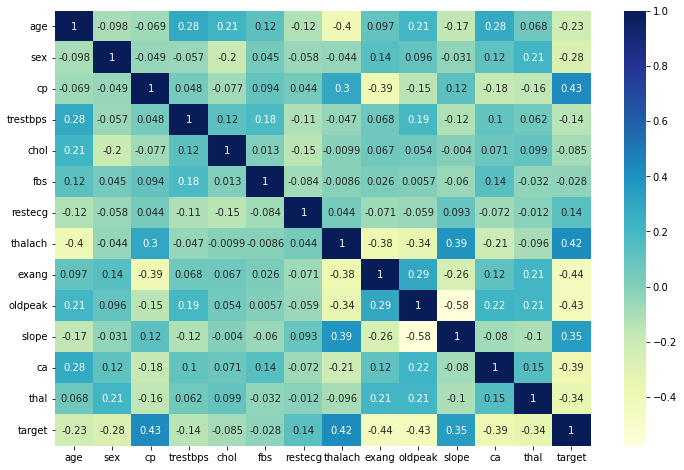

In [ ]:
#aqui um grafico de correlacao
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

## 3 Processamento de Dados

In [ ]:
#independent and Dependent Feature
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


In [ ]:
#importing performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 4 e 5 Criando Máquinas Preditivas com Machine Learning

In [ ]:
#Familia Emsemble

#RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)

#Predictions 
y_pred = RandomForest.predict(X_test)

#Perfomance
print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8552631578947368
[[26  7]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train, y_train)

#Predictions
y_pred = AdaBoost.predict(X_test)

#Performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8421052631578947
[[26  7]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [ ]:
#GradienteBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train, y_train)

#Predictions
y_pred = GradientBoost.predict(X_test)

#Performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8026315789473685
[[24  9]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.80      0.86      0.83        43

    accuracy                           0.80        76
   macro avg       0.80      0.79      0.80        76
weighted avg       0.80      0.80      0.80        76



## 6 Deploy 